# Unsupervised Learning Algorithms - Dendrograms

#### Import libraries and datasets
#### Scale data
#### Dendrograms - Single, Complete, Average, Ward
#### PCA - Principal Component Analysis

In [106]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [107]:
# Define path
path = r'C:\Users\melan\OneDrive\Career Foundry\Machine Learning with Python\Data Sets'

In [108]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\Machine Learning with Python\\Data Sets'

In [109]:
# Import pleasant weather answers csv file
pleasant_weather = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [110]:
pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
pleasant_weather.shape

(22950, 16)

In [154]:
pleasant_weather_1960 = pleasant_weather[pleasant_weather['DATE'].astype(str).str.contains('1960')]

In [112]:
# Import unscaled weather csv file
unscaled = pd.read_csv(os.path.join(path,'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [113]:
unscaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [114]:
#Reduce your dataset to a single year
reduced = unscaled[unscaled['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
reduced

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,19601227,12,8,2.1,0.98,1.018,0.18,0.55,0,0.0,...,6,0.77,0.9993,0.30,2.09,0,1.8,5.3,2.9,7.7
362,19601228,12,4,2.1,0.93,1.018,0.41,0.00,0,1.8,...,6,0.73,0.9954,0.19,0.60,0,0.3,5.7,2.5,8.9
363,19601229,12,7,2.1,0.89,1.018,0.37,0.01,0,1.3,...,6,0.86,1.0044,0.12,1.27,0,0.0,7.4,3.2,11.6
364,19601230,12,6,2.1,0.85,1.018,0.62,0.06,0,5.3,...,6,0.77,1.0026,0.34,1.14,0,2.3,6.6,4.8,8.9


In [115]:
#Scaling 'reduced' dataframe using Standard Scaler
scaler = StandardScaler()

In [148]:
df_1960 = pd.DataFrame(scaler.fit_transform(reduced), columns = reduced.columns)

In [150]:
df_1960.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.639546,-1.597591,0.570848,-4.440892e-16,0.623770,-2.220446e-16,-1.071460,-0.305217,-0.20878,-0.871676,...,-0.385140,0.788172,-0.848454,-0.864171,-0.183800,-0.052342,0.175924,-0.542397,-0.349356,-0.729979
1,-1.636649,-1.597591,0.133755,-4.440892e-16,0.535928,-2.220446e-16,-1.029711,1.989201,-0.20878,-0.775269,...,0.775034,1.197544,-0.814862,-1.077929,0.565484,-0.052342,-0.851000,-0.435710,-0.444617,-0.408923
2,-1.633753,-1.597591,1.007941,-4.440892e-16,1.062976,-2.220446e-16,-1.217584,0.196687,-0.20878,-1.040387,...,0.775034,1.197544,-0.067437,-1.163432,-0.573427,-0.052342,-1.005039,-0.008963,0.150765,-0.194885
3,-1.630857,-1.597591,-1.177524,-4.440892e-16,1.238659,-2.220446e-16,-0.800088,-0.520319,-0.20878,-0.052220,...,0.775034,0.515257,0.671590,-1.206183,0.775284,-0.052342,-1.030712,-0.835786,-0.039757,-0.810243
4,-1.627961,-1.597591,0.133755,-4.440892e-16,1.502183,-2.220446e-16,-0.727026,-0.185716,-0.20878,0.261101,...,-1.545314,-0.303487,1.880907,-0.853483,-0.693313,-0.052342,0.432655,-1.289205,-1.063815,-1.398846


In [118]:
df_1960.shape

(366, 170)

In [119]:
pca = PCA(n_components=11)  # Set the number of components you want
pca_transformed = pca.fit_transform(reduced)  # This will give you the PCA-transformed data

In [120]:
# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2', 'PCA3','PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11'])

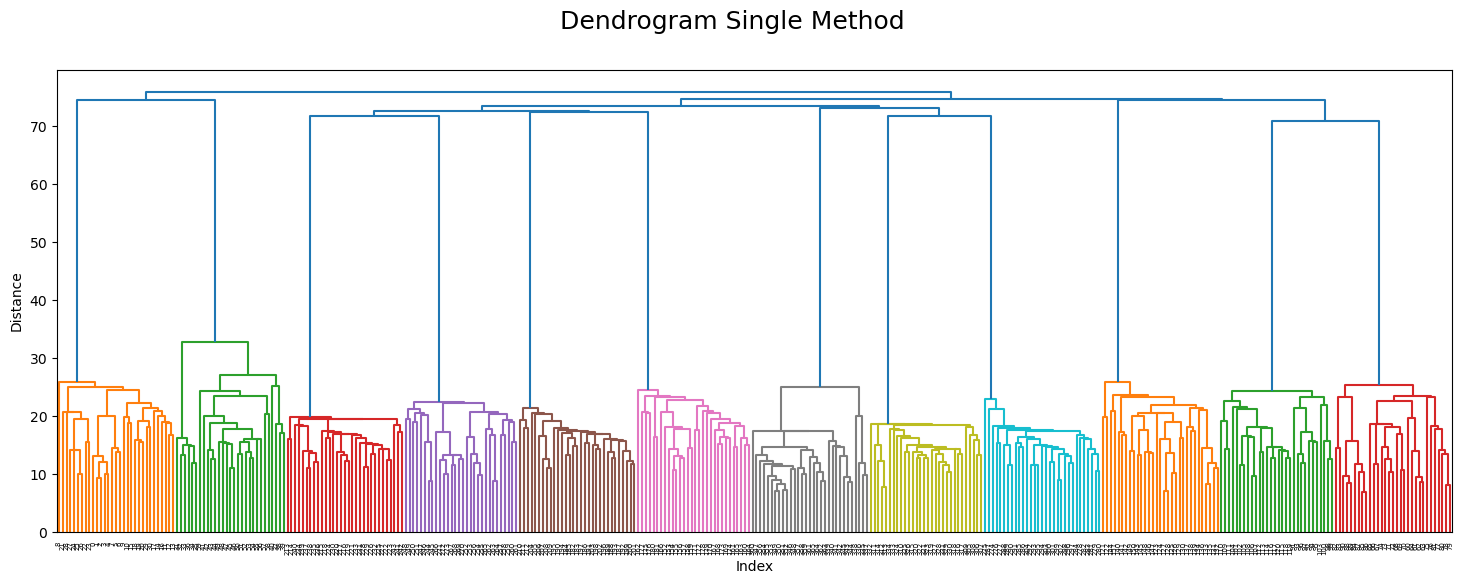

In [121]:
distance_single = linkage(pca_df.loc[:,
['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11' ]],method = "single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

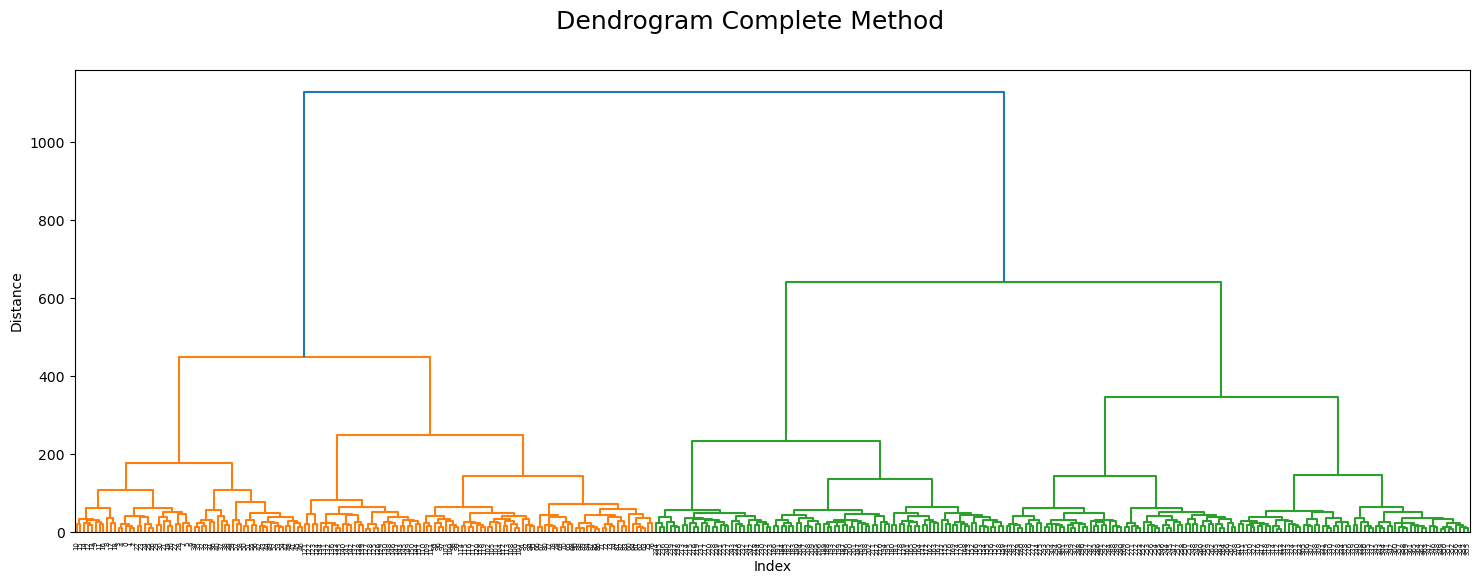

In [122]:
#dendrogram using 'complete' method
distance_complete = linkage(pca_df.loc[:,
['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11' ]],method = "complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

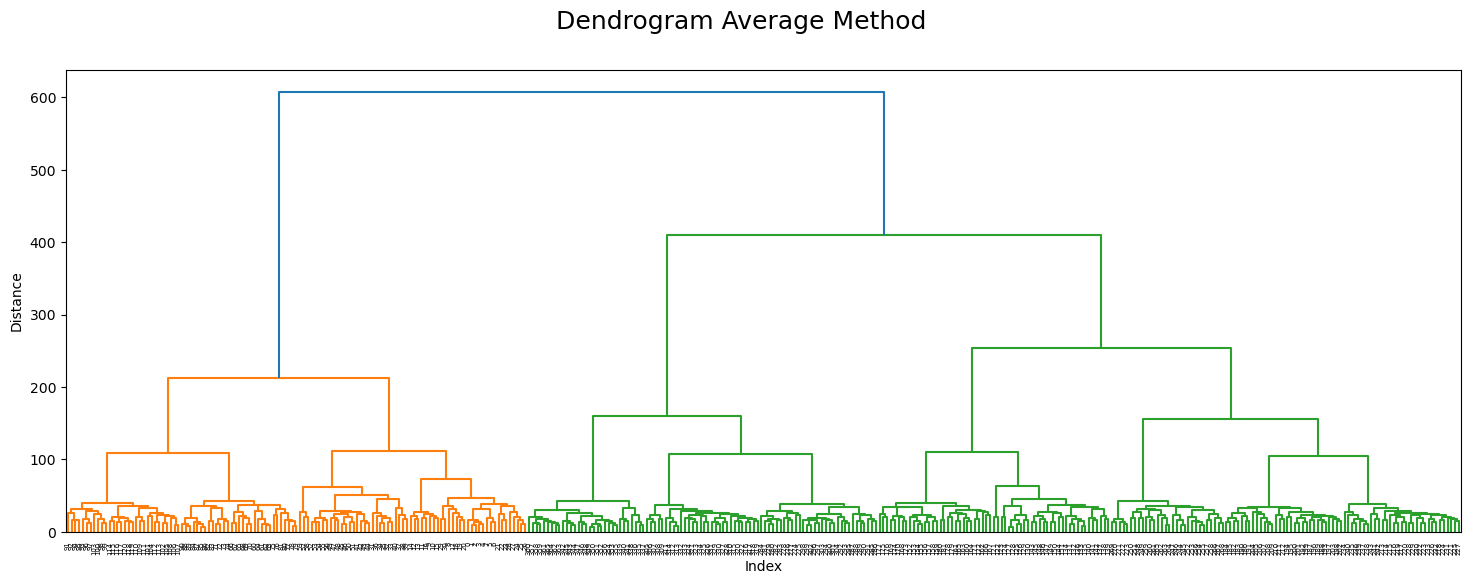

In [123]:
#dendrogram using 'average' method
distance_average = linkage(pca_df.loc[:,
['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11' ]],method = "average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

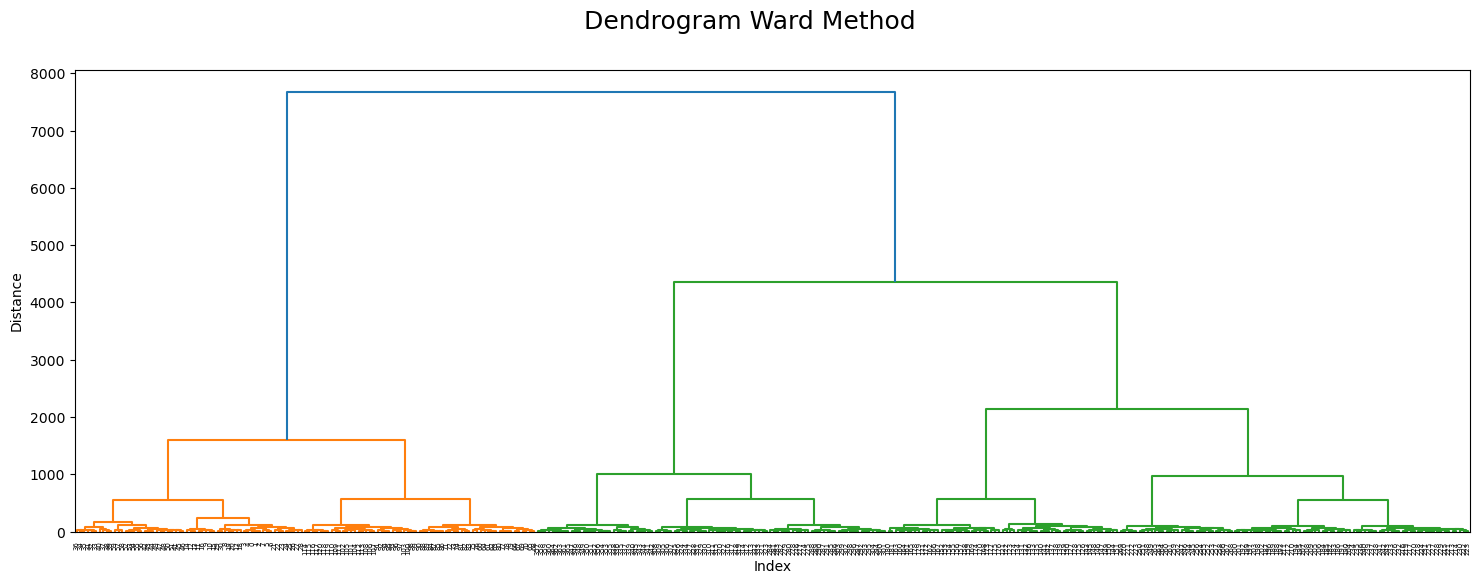

In [124]:
#dendrogram using 'ward' method
distance_ward = linkage(pca_df.loc[:,
['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11' ]],method = "ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

In [125]:
#export 1960 PCA dataset to csv file
pca_df.to_csv(os.path.join(path, '1960_PCA.csv'))

In [183]:
plot_df = pca_df[['PCA1', 'PCA2']].copy()
plot_df['cluster']=fcluster(distance_complete,2, criterion='maxclust')
plot_df.head()

,PCA1,PCA2,cluster
0,566.674661,10.440270,1
1,565.694687,11.399084,1
2,564.739819,12.772275,1
3,563.970463,16.690636,1
4,562.953803,16.205804,1


In [185]:
#Belgrade
plot_df['label'] = pleasant_weather_1960['BELGRADE_pleasant_weather']
plot_df.head()

,PCA1,PCA2,cluster,label
0,566.674661,10.440270,1,0
1,565.694687,11.399084,1,0
2,564.739819,12.772275,1,0
3,563.970463,16.690636,1,0
4,562.953803,16.205804,1,0


<Axes: title={'center': 'label'}, xlabel='PCA1', ylabel='PCA2'>

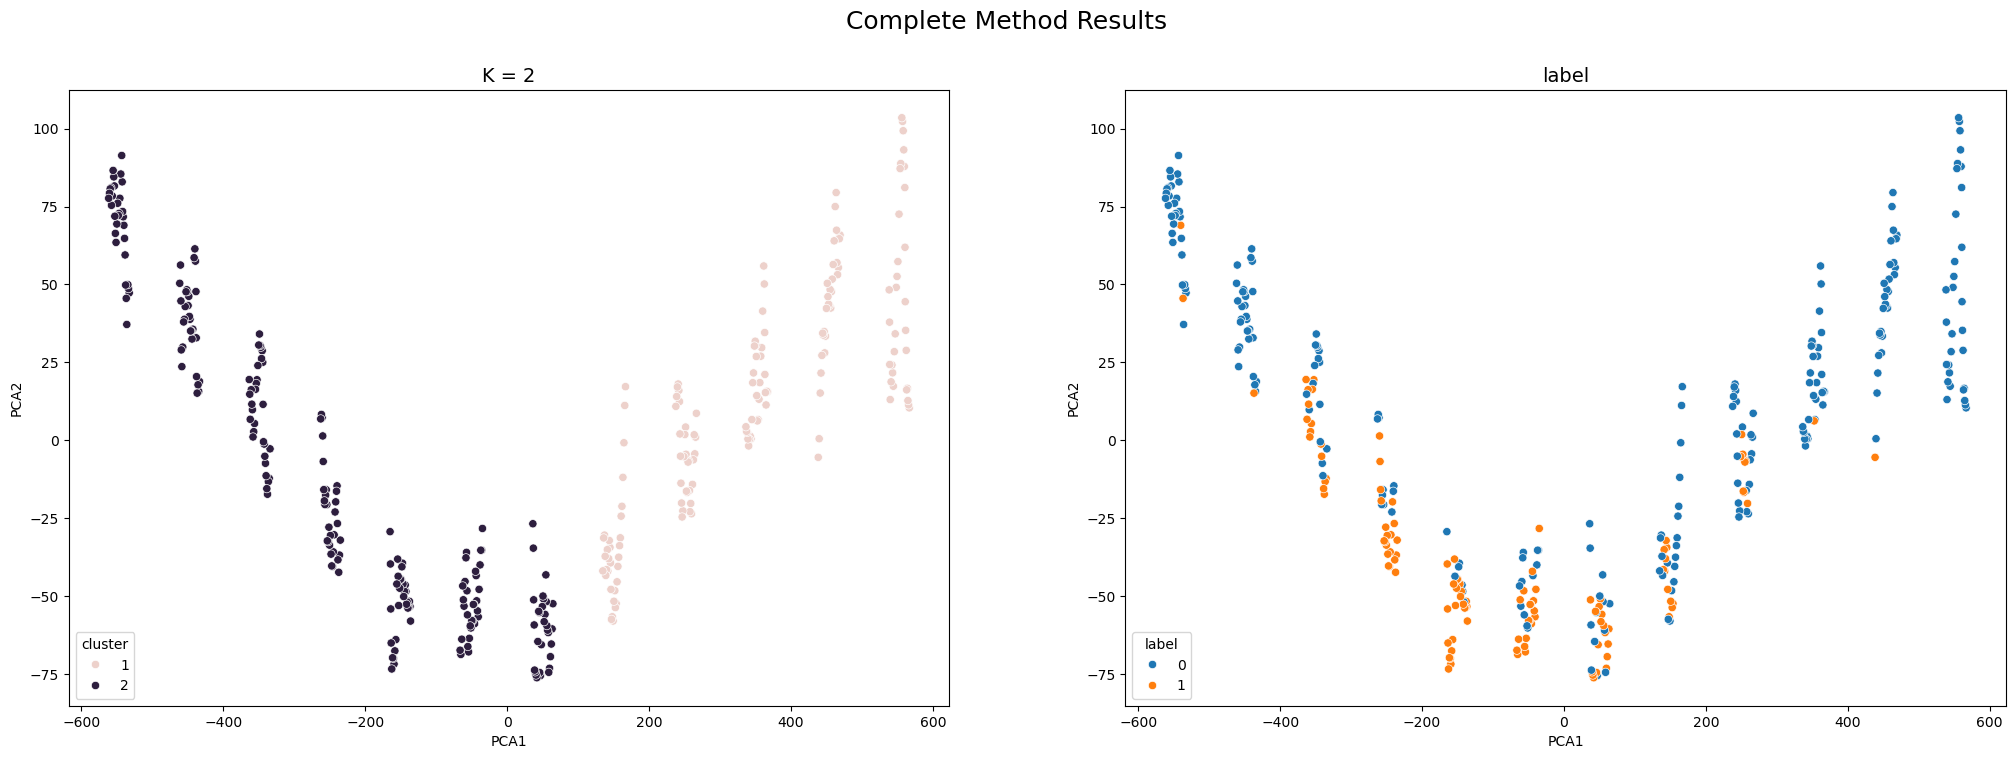

In [189]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="cluster")

plt.subplot(1,2,2)
plt.title("label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="label")

In [191]:
#Dusseldorf
plot_df['label'] = pleasant_weather_1960['DUSSELDORF_pleasant_weather']
plot_df.head()

,PCA1,PCA2,cluster,label
0,566.674661,10.440270,1,0
1,565.694687,11.399084,1,0
2,564.739819,12.772275,1,0
3,563.970463,16.690636,1,0
4,562.953803,16.205804,1,0


<Axes: title={'center': 'label'}, xlabel='PCA1', ylabel='PCA2'>

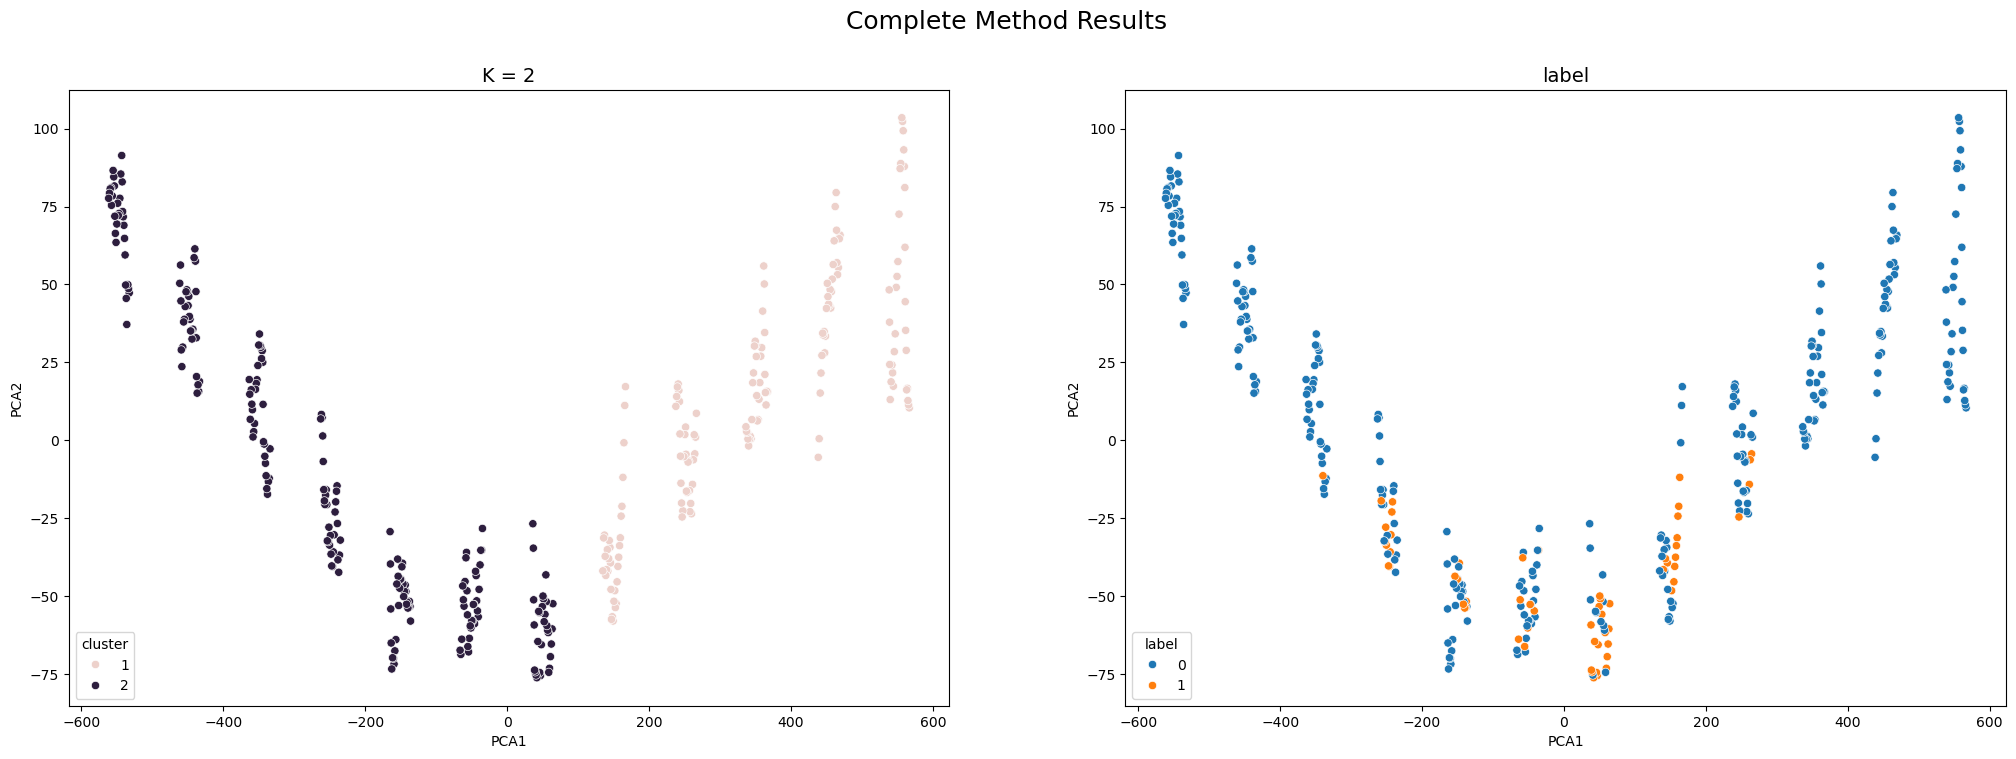

In [193]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="cluster")

plt.subplot(1,2,2)
plt.title("label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="label")

In [197]:
#Madrid
plot_df['label'] = pleasant_weather_1960['MADRID_pleasant_weather']
plot_df.head()

,PCA1,PCA2,cluster,label
0,566.674661,10.440270,1,0
1,565.694687,11.399084,1,0
2,564.739819,12.772275,1,0
3,563.970463,16.690636,1,0
4,562.953803,16.205804,1,0


<Axes: title={'center': 'label'}, xlabel='PCA1', ylabel='PCA2'>

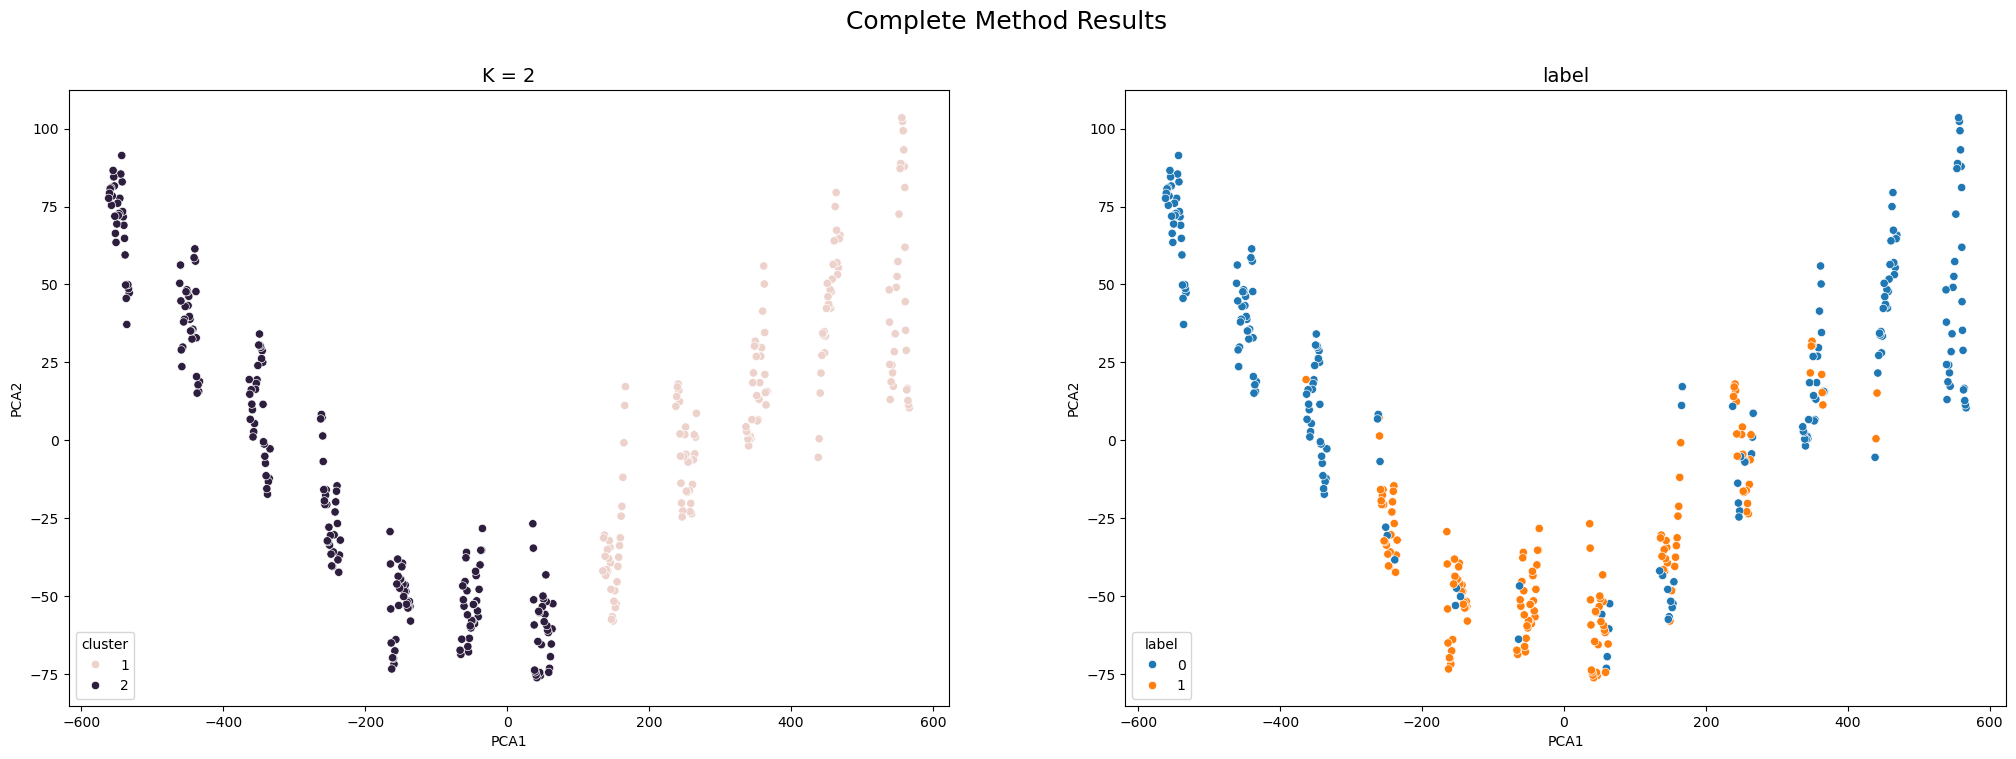

In [199]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="cluster")

plt.subplot(1,2,2)
plt.title("label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="label")

In [203]:
#Valentia
plot_df['label'] = pleasant_weather_1960['VALENTIA_pleasant_weather']
plot_df.head()

,PCA1,PCA2,cluster,label
0,566.674661,10.440270,1,0
1,565.694687,11.399084,1,0
2,564.739819,12.772275,1,0
3,563.970463,16.690636,1,0
4,562.953803,16.205804,1,0


<Axes: title={'center': 'label'}, xlabel='PCA1', ylabel='PCA2'>

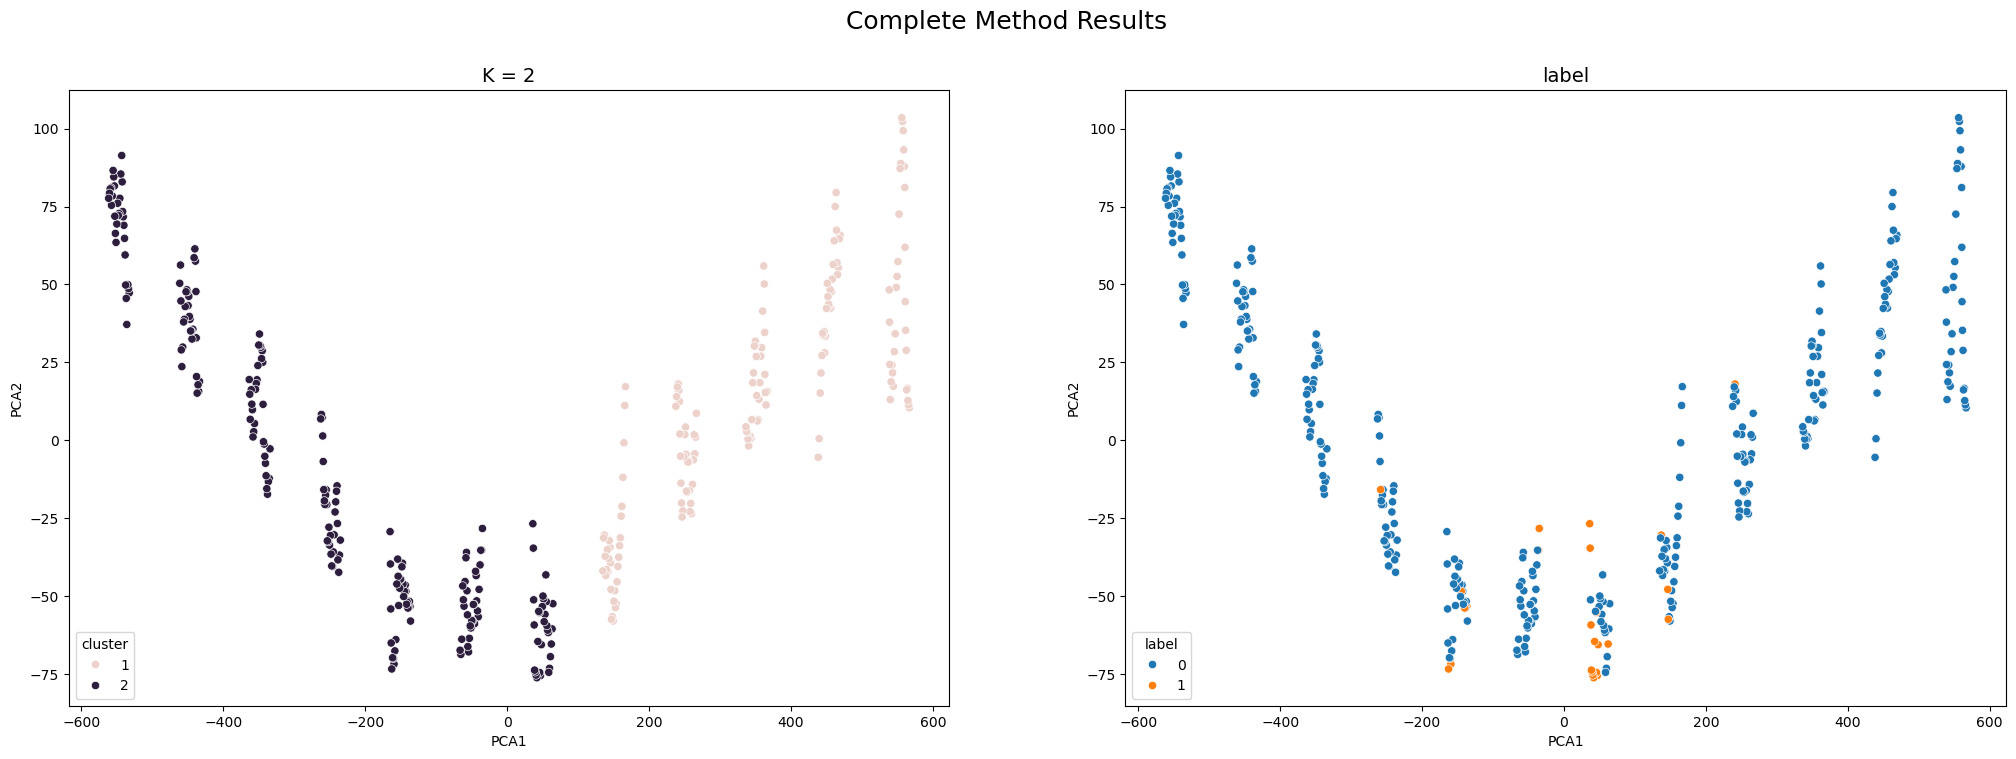

In [205]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="cluster")

plt.subplot(1,2,2)
plt.title("label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=plot_df, hue="label")